In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append(f'E:\gitlab\custom-script\script')
from ursar import time_series

%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load dataset

In [46]:
df = pd.read_csv(f"E:/gitlab/machine-learning/dataset/dummy_topup_data.csv", sep=",", index_col=None)

In [47]:
df

,datetime,sum_amount,avg_amount_per_user,anomaly
0,2017-05-16 00:10:00,26.323942,16.474923,False
1,2017-05-16 00:40:00,25.363050,15.325484,False
2,2017-05-16 01:10:00,25.443192,11.128038,False
3,2017-05-16 01:40:00,26.149407,10.833380,False
4,2017-05-16 02:10:00,25.801580,10.858455,False
...,...,...,...,...
12269,2018-01-26 14:40:00,26.103956,13.934151,False
12270,2018-01-26 15:10:00,26.499405,14.409160,False
12271,2018-01-26 15:40:00,26.380532,14.416234,False
12272,2018-01-26 16:10:00,26.207231,14.174578,False


# Convert datetime column to pandas.datetime dtype and setting it as the index of the dataframe

In [48]:
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index('datetime').sort_index()

# moving average

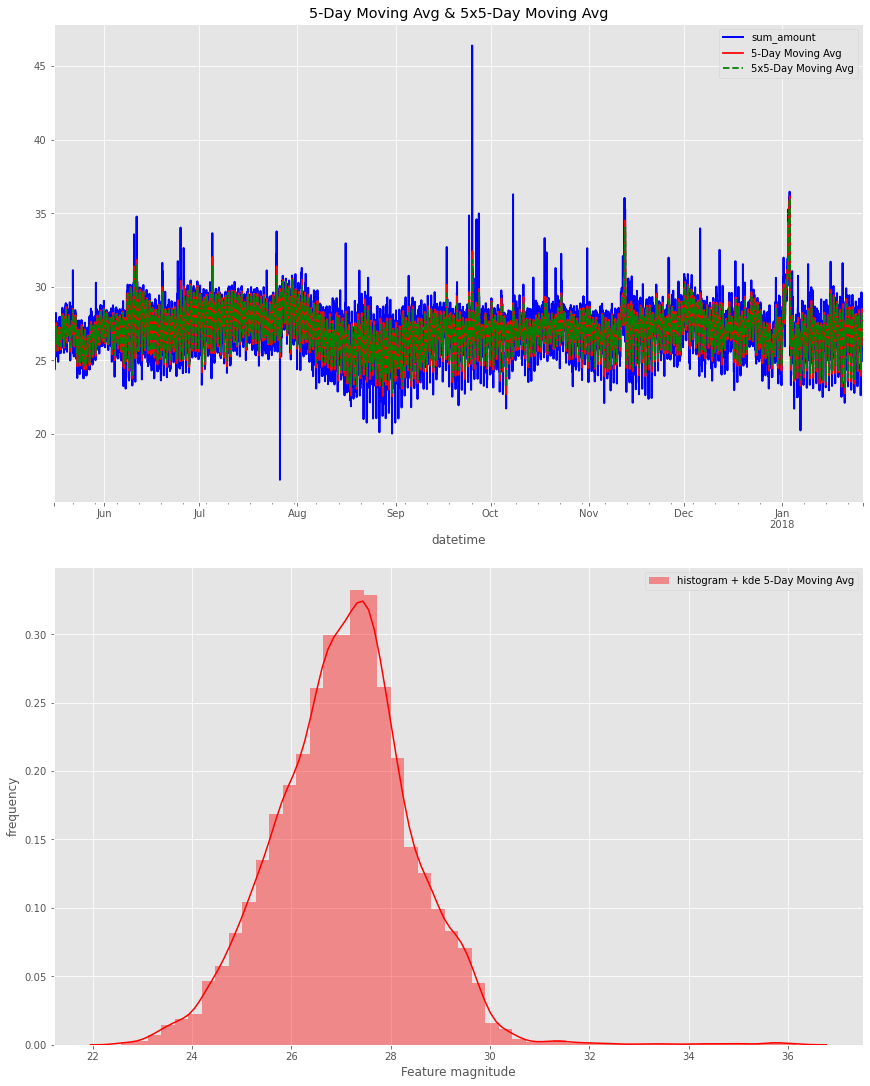

In [49]:
time_series.moving_average(df,"sum_amount",5,bins=50,show_mxm=True)

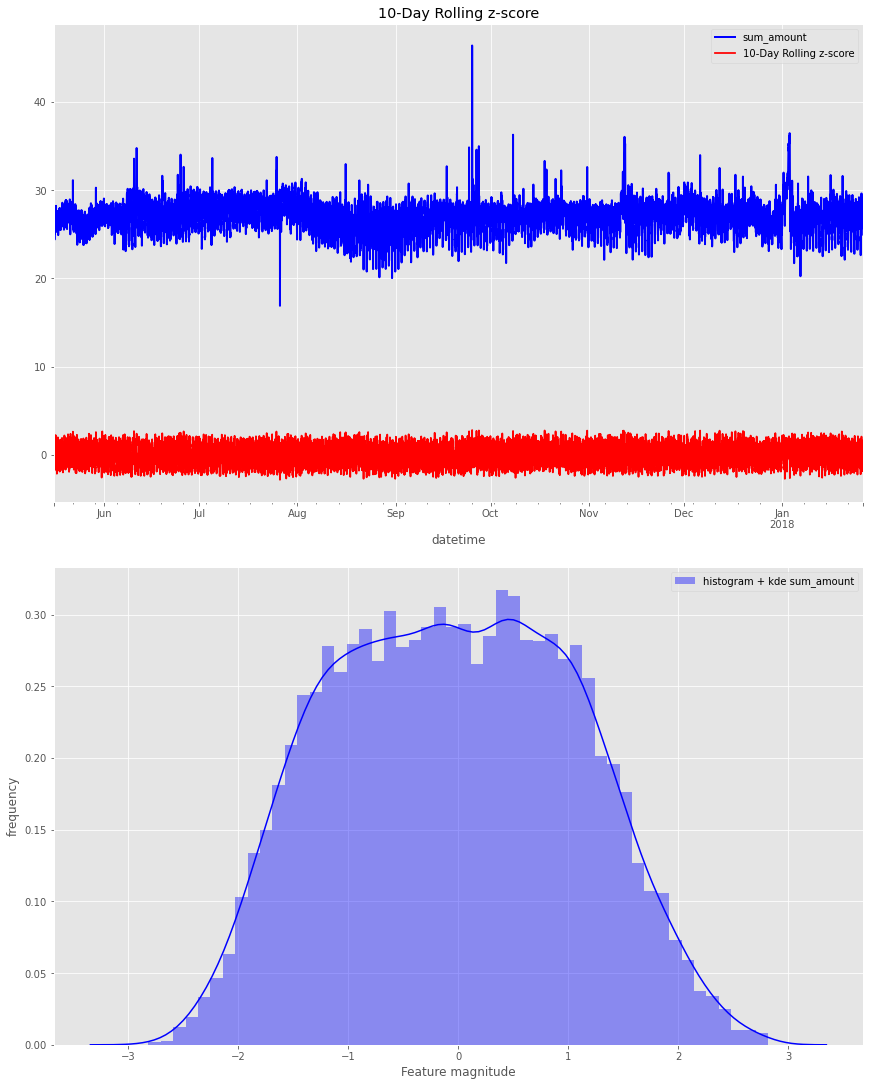

In [50]:
time_series.z_score(df,"sum_amount",10,bins=50)

In [51]:
df

,sum_amount,avg_amount_per_user,anomaly,5-Day Moving Avg,5x5-Day Moving Avg,10-Day Rolling z-score
datetime,,,,,,
2017-05-16 00:10:00,26.323942,16.474923,False,25.816234,25.816234,0.370560
2017-05-16 00:40:00,25.363050,15.325484,False,25.816234,25.816234,0.370560
2017-05-16 01:10:00,25.443192,11.128038,False,25.816234,25.816234,0.370560
2017-05-16 01:40:00,26.149407,10.833380,False,25.816234,25.816234,0.370560
2017-05-16 02:10:00,25.801580,10.858455,False,25.816234,25.816234,0.370560
...,...,...,...,...,...,...
2018-01-26 14:40:00,26.103956,13.934151,False,26.931094,27.334602,-1.522015
2018-01-26 15:10:00,26.499405,14.409160,False,26.912292,27.203405,-0.865601
2018-01-26 15:40:00,26.380532,14.416234,False,26.544841,27.013961,-0.856319
